In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ..

/home/shibinbin/ibme/projects/Deepfold2


In [85]:
import pandas as pd
import seaborn as sns
sns.set()
plt.rcParams['figure.dpi'] = 150

In [4]:
cm_ids = open('metadata/rfam_ids_10.txt', 'r').read().split()
models = ['conv{}'.format(i) for i in range(4)]
records = []
for cm_id in cm_ids:
    for pct in (10, 20, 30, 40, 50, 60, 70, 80):
        for model in models:
            with open('output/rfam_sample/metrics/512.mix{}/{}.{}.txt'.format(pct, cm_id, model), 'r') as f:
                record = {}
                for line in f:
                    key, val = line.strip().split('\t')
                    record[key] = float(val)
                record['percentage'] = pct
                record['model'] = model
                record['cm_id'] = cm_id
                records.append(record)
records = pd.DataFrame.from_records(records)

In [9]:
records_mean = records.groupby(['model', 'percentage'], as_index=False).mean()
records_mean.head()

,model,percentage,roc_auc_given,roc_auc_pos_true,roc_auc_true
0,conv0,10,0.635292,0.653962,0.650808
1,conv0,20,0.619295,0.643635,0.644856
2,conv0,30,0.609625,0.638137,0.642921
3,conv0,40,0.593053,0.634140,0.636368
4,conv0,50,0.584286,0.628839,0.632992


(0, 1.1)

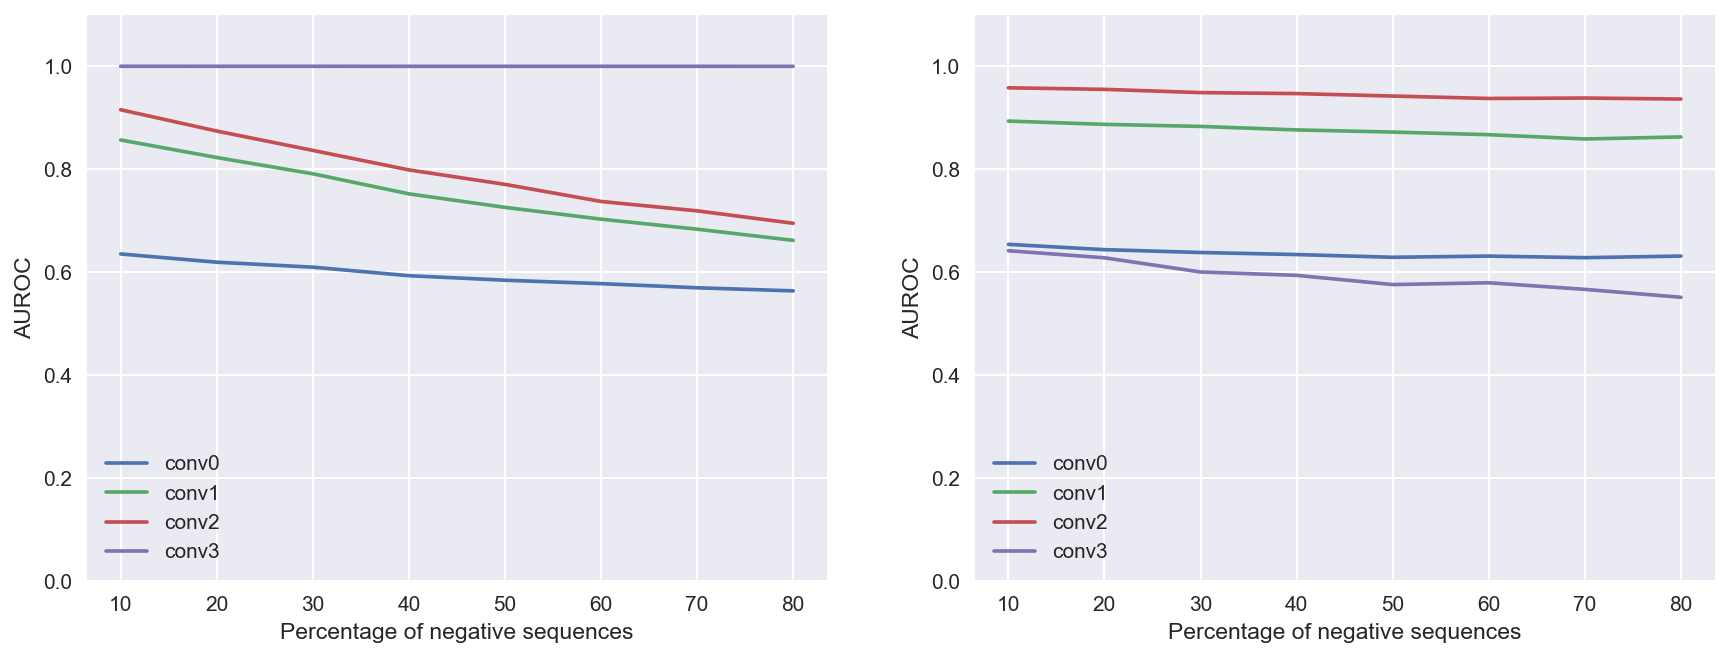

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for model, df in records_mean.groupby('model'):
    axes[0].plot(df['percentage'], df['roc_auc_given'], label=model)
    axes[1].plot(df['percentage'], df['roc_auc_pos_true'], label=model)
axes[0].legend()
axes[0].set_xlabel('Percentage of negative sequences')
axes[0].set_ylabel('AUROC')
axes[0].set_ylim(0, 1.1)
axes[1].legend()
axes[1].set_xlabel('Percentage of negative sequences')
axes[1].set_ylabel('AUROC')
axes[1].set_ylim(0, 1.1)

In [109]:
# classification performance without mix
rfam_ids = open('metadata/rfam_ids_10.txt', 'r').read().split()
models = ['conv{}'.format(i) for i in range(4)]
records_mix0 = []
for cm_id in cm_ids:
    for model in models:
        with open('output/rfam_sample/metrics/512/{}.{}.txt'.format(cm_id, model), 'r') as f:
            record = {}
            for line in f:
                key, val = line.strip().split('\t')
                record[key] = float(val)
            record['percentage'] = pct
            record['model'] = model
            record['cm_id'] = cm_id
            records_mix0.append(record)
records_mix0 = pd.DataFrame.from_records(records_mix0)
records_mix0.head()

,cm_id,model,percentage,roc_auc
0,5S_rRNA,conv0,80,0.599882
1,5S_rRNA,conv1,80,0.839820
2,5S_rRNA,conv2,80,0.940686
3,5S_rRNA,conv3,80,0.999869
4,tRNA,conv0,80,0.608335


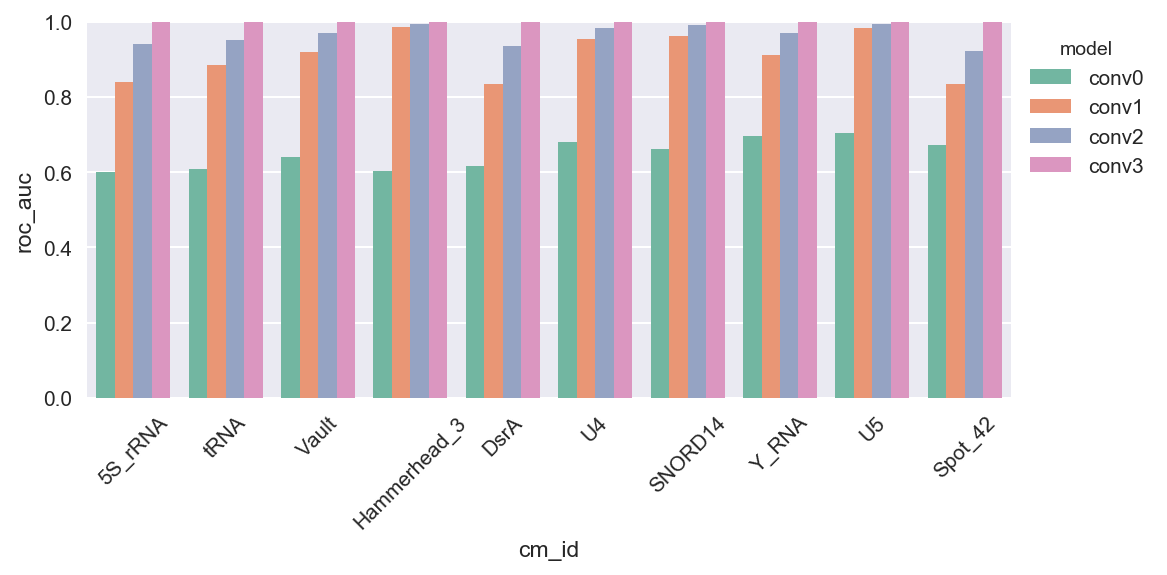

In [111]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(x='cm_id', y='roc_auc', hue='model', data=records_mix0, ax=ax, palette='Set2')
for text in ax.get_xticklabels():
    text.set_rotation(45)
ax.set_ylim(0, 1)
ax.get_legend().set_bbox_to_anchor((1, 1))
plt.tight_layout()

In [40]:
jaspar_ids = open('metadata/jaspar_selected_ids.txt', 'r').read().split()
models = ['mlp1', 'mlp2']
records_jaspar = []
for jaspar_id in jaspar_ids:
    for model in models:
        record = {}
        with open('output/jaspar_sample/vae_model/128/{}.{}.metrics.txt'.format(jaspar_id, model), 'r') as f:
            for line in f:
                key, val = line.strip().split('\t')
                record[key] = float(val)
            record['model'] = model
            record['jaspar_id'] = jaspar_id
        with open('output/jaspar_sample/vae_model/128/{}.{}.evaluate_metrics.txt'.format(jaspar_id, model), 'r') as f:
            for line in f:
                key, val = line.strip().split('\t')
                record[key] = float(val)
        records_jaspar.append(record)
records_jaspar = pd.DataFrame.from_records(records_jaspar)
records_jaspar.head()

,categorical_accuracy,jaspar_id,kl_loss,loss,model,nll_loss,roc_auc
0,0.930000,MA0745.1,1.793402,3.976376,mlp1,2.182974,0.990864
1,0.945200,MA0745.1,1.792494,3.080400,mlp2,1.287906,0.989809
2,0.946880,MA0670.1,1.633383,3.435562,mlp1,1.802179,0.999067
3,0.957540,MA0670.1,1.526212,2.546088,mlp2,1.019875,0.999962
4,0.934086,MA0498.2,1.234895,2.850286,mlp1,1.615391,0.989518


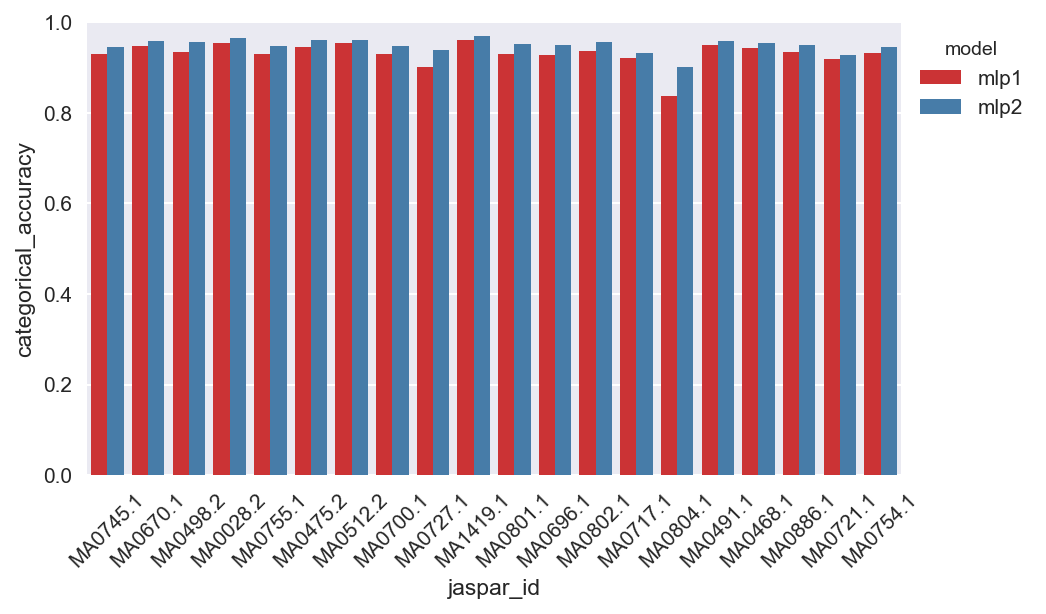

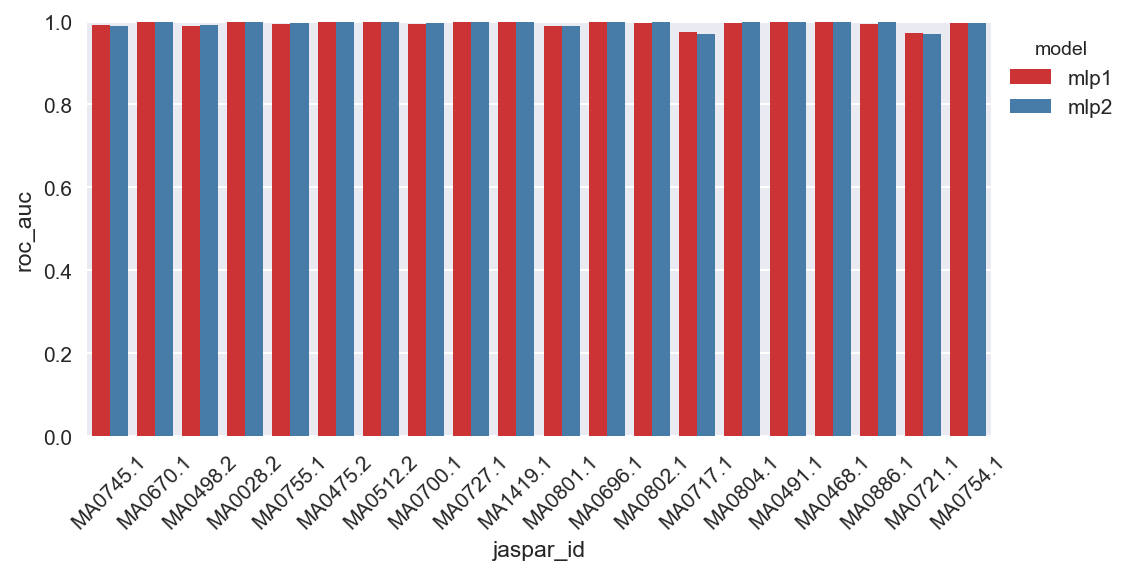

In [105]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(x='jaspar_id', y='categorical_accuracy', hue='model', data=records_jaspar, ax=ax, palette='Set1')
for text in ax.get_xticklabels():
    text.set_rotation(45)
ax.set_ylim(0, 1)
ax.get_legend().set_bbox_to_anchor((1, 1))

fig, ax = plt.subplots(figsize=(7, 4))
sns.barplot(x='jaspar_id', y='roc_auc', hue='model', data=records_jaspar, ax=ax, palette='Set1')
for text in ax.get_xticklabels():
    text.set_rotation(45)
ax.set_ylim(0, 1)
ax.get_legend().set_bbox_to_anchor((1, 1))
plt.tight_layout()

In [48]:
rfam_ids = open('metadata/rfam_ids_10.txt', 'r').read().split()
models = ['mlp1', 'mlp2']
records_rfam = []
for rfam_id in rfam_ids:
    for model in models:
        record = {}
        with open('output/rfam_sample/vae_model/512/{}.{}.metrics.txt'.format(rfam_id, model), 'r') as f:
            for line in f:
                key, val = line.strip().split('\t')
                record[key] = float(val)
            record['model'] = model
            record['rfam_id'] = rfam_id
        with open('output/rfam_sample/vae_model/512/{}.{}.evaluate_metrics.txt'.format(rfam_id, model), 'r') as f:
            for line in f:
                key, val = line.strip().split('\t')
                record[key] = float(val)
        records_rfam.append(record)
records_rfam = pd.DataFrame.from_records(records_rfam)
records_rfam = records_rfam.loc[:, ['rfam_id', 'model', 'loss', 'nll_loss', 'kl_loss', 'categorical_accuracy', 'roc_auc']]
records_rfam.head()

,rfam_id,model,loss,nll_loss,kl_loss,categorical_accuracy,roc_auc
0,5S_rRNA,mlp1,142.034347,138.652304,3.382043,0.406668,0.999947
1,5S_rRNA,mlp2,139.362123,135.162291,4.199832,0.417065,0.999920
2,tRNA,mlp1,83.235904,78.823175,4.412729,0.350854,0.999995
3,tRNA,mlp2,80.571590,74.922191,5.649399,0.370392,0.999995
4,Vault,mlp1,117.821639,113.738052,4.083588,0.310022,0.999986


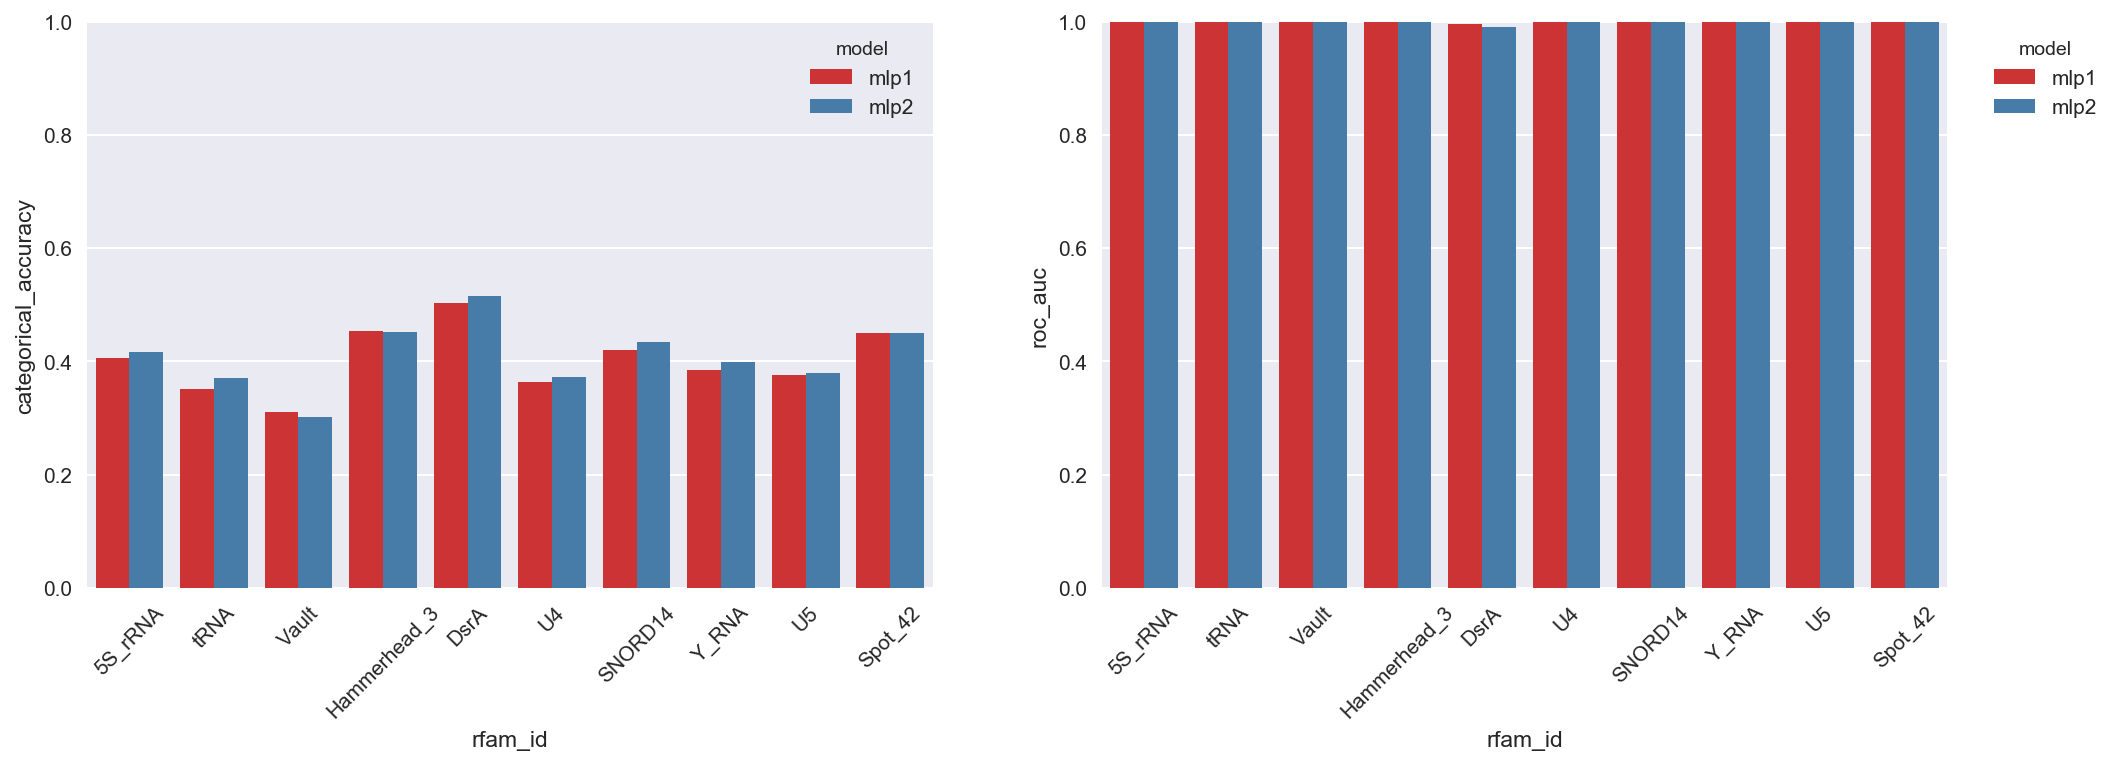

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(x='rfam_id', y='categorical_accuracy', hue='model', data=records_rfam, ax=axes[0], palette='Set1')
for text in axes[0].get_xticklabels():
    text.set_rotation(45)
axes[0].set_ylim(0, 1)
sns.barplot(x='rfam_id', y='roc_auc', hue='model', data=records_rfam, ax=axes[1], palette='Set1')
for text in axes[1].get_xticklabels():
    text.set_rotation(45)
axes[1].set_ylim(0, 1)
axes[1].get_legend().set_bbox_to_anchor((1.2, 1))

In [87]:
sns.choose_colorbrewer_palette('qualitative')

interactive(children=(Dropdown(description='name', options=('Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Pastel1', 'Pastel2', 'Dark2'), value='Set1'), IntSlider(value=9, description='n', max=16, min=2), FloatSlider(value=1.0, description='desat', max=1.0), Output()), _dom_classes=('widget-interact',))

[(0.8941176470588235, 0.10196078431372557, 0.10980392156862737),
 (0.21568627450980393, 0.4941176470588236, 0.7215686274509804),
 (0.3019607843137256, 0.6862745098039216, 0.29019607843137263),
 (0.5960784313725492, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (0.9999999999999998, 1.0, 0.19999999999999996),
 (0.6509803921568629, 0.33725490196078434, 0.1568627450980391),
 (0.9686274509803922, 0.5058823529411766, 0.7490196078431374),
 (0.6, 0.6, 0.6)]

In [84]:
plt.rcParams['figure.dpi']

72.0

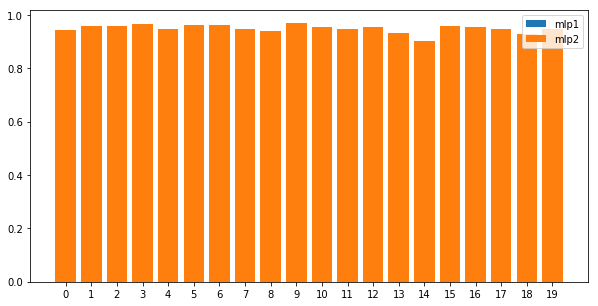

In [35]:
fig, axes = plt.subplots(figsize=(10, 5))
for model, df in records_jaspar.groupby(['model']):
    x = np.arange(df.shape[0])
    axes.bar(x, df['categorical_accuracy'], label=model)
    axes.set_xticks(x)
axes.legend()
    #axes.set_xticklabels(df['jaspar_id'])

In [41]:
records_jaspar.query('model == "mlp1"').to_csv('tmp/jaspar.csv')